# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()


   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: admit has 400 observations, GRE has 398 observations, GPA has 398 observations, and prestige has 399 observations. The data will need to be cleaned before we can proceed with the analysis.

#### Question 2. Create a summary table

In [4]:
#function
df_raw.describe()


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger standard deviation than GPA because its range of possible scores is much higher. It's not apples and apples here. GRE score can go as high as 800 and as low as 220, while GPA has a minimum of 2.26 and a maximum of 4.00.

#### Question 4. Drop data points with missing data


In [5]:
dfCopy = df_raw.copy()
print dfCopy[np.isnan(dfCopy.gre)]
print dfCopy[np.isnan(dfCopy.gpa)]
print dfCopy[np.isnan(dfCopy.admit)]
print dfCopy[np.isnan(dfCopy.prestige)]

     admit  gre   gpa  prestige
187      0  NaN   NaN       2.0
212      0  NaN  2.87       2.0
     admit    gre  gpa  prestige
187      0    NaN  NaN       2.0
236      1  660.0  NaN       NaN
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []
     admit    gre  gpa  prestige
236      1  660.0  NaN       NaN


It looks like 'gre' has 2 nan's, 'gpa' has 2 nan's, and prestige has 1 nan. We can use dropna() to get rid of these

In [6]:
dfCopy = dfCopy.dropna()


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [7]:
print dfCopy.isnull().sum()
print dfCopy.count()
print dfCopy[np.isnan(dfCopy.gre)]
print dfCopy[np.isnan(dfCopy.gpa)]
print dfCopy[np.isnan(dfCopy.admit)]
print dfCopy[np.isnan(dfCopy.prestige)]

admit       0
gre         0
gpa         0
prestige    0
dtype: int64
admit       397
gre         397
gpa         397
prestige    397
dtype: int64
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []


Answer: here we have verified that there are no more nan values in each variable by checking three different ways.

1. Using dfCopy.isnull().sum(), we have summed the number of entries in dfCopy which are nan.
2. We have counted the entries in each variable, and they all match.
3. Additionally, we can see that calling for nan entries in each variable returns an empty dataframe. The np.isnan() method will return a list of booleans, where a "True" entry corresponds to a nan value in the original data set, and a "False" value corresponds to anything that isn't a nan value.

#### Question 6. Create box plots for GRE and GPA

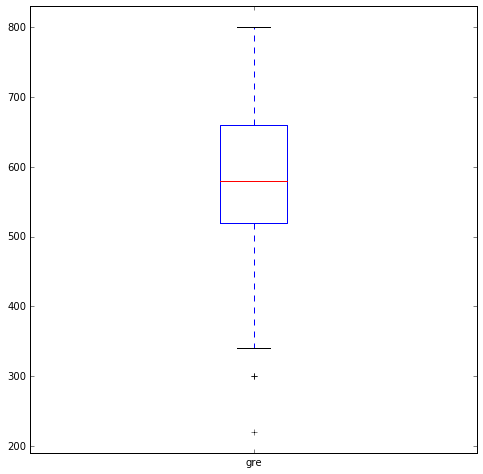

In [8]:
#boxplot 1 - GRE

plt.ylim(np.min(dfCopy.gre)-30,np.max(dfCopy.gre)+30)
dfCopy.gre.plot.box(figsize=[8,8])

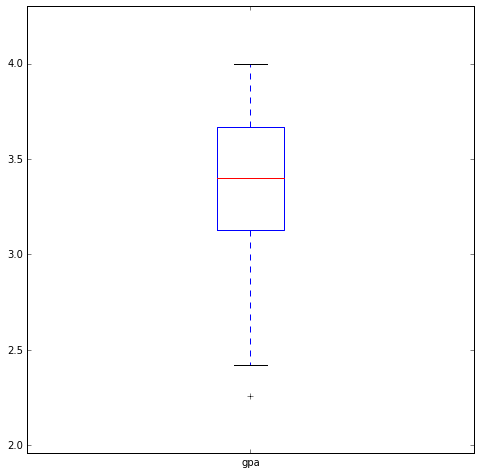

In [9]:
#boxplot 2 

plt.ylim(np.min(dfCopy.gpa)-0.30,np.max(dfCopy.gpa)+0.30)
dfCopy.gpa.plot.box(figsize=[8,8])

#### Question 7. What do this plots show?

Answer: 
A box plot shows a summary of the data. The red line indicates the median of our data on the y-axis. 

The top and bottom edges of the box show the upper and lower quartiles, respetively. Any values outside of these lines are in the 25th percentile - meaning 25% of the data are above/below the upper/lower edges. 

The dotted vertical lines capped with the horizontal lines (the 'whiskers') show the maximum (upper line) and minimum (lower line) values in our data set.

The single dots at the edges are outliers. A data point which is an outlier (one that is not typical of our data) is deemed so when it exceeds 3/2 times the upper quartile (or is less than 2/3 of the lower quartile).

An annotated example is shown below for randomly generated data points:

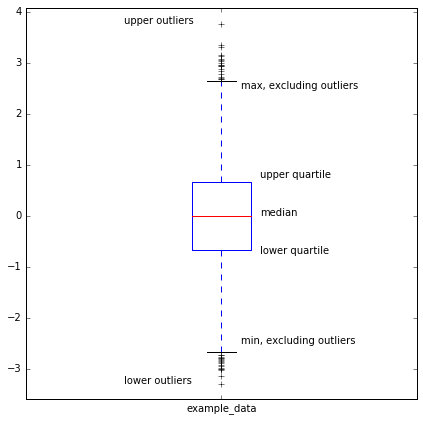

In [10]:
# randomly generate data from a normal distribution
exData = pd.DataFrame({'example_data': np.random.randn(4500)})
plt.ylim(np.min(exData['example_data'])-0.30,
         np.max(exData['example_data'])+0.30)


ax = exData['example_data'].plot(kind='box',figsize=(7,7))#,xlim=(np.min(exData)-.25,np.max(exData)+.25))
                 #ymax=np.max(exData)+.25) 
ax.text(1.1,0,'median')
ax.text(1.1,0.75,'upper quartile')
ax.text(1.05,2.5,'max, excluding outliers')
ax.text(.75,np.max(exData),'upper outliers')
ax.text(1.1,-0.75,'lower quartile')
ax.text(1.05,-2.5,'min, excluding outliers')
ax.text(.75,np.min(exData),'lower outliers')
plt.show()


#### Question 8. Describe each distribution 

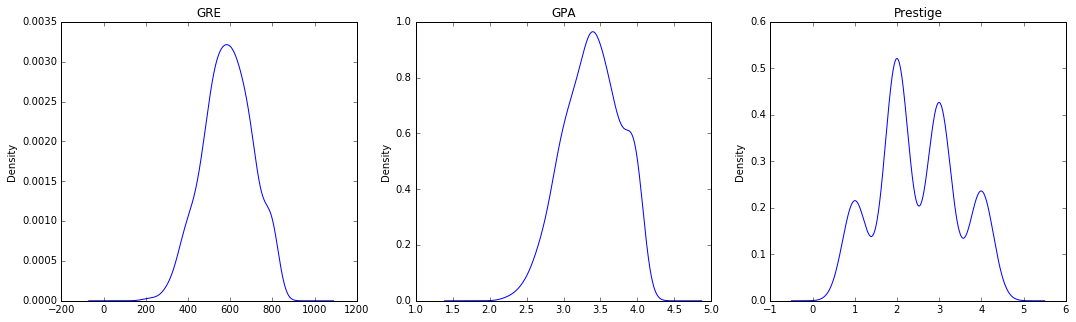

In [11]:
# plot the distribution of each variable 
fig, axs = plt.subplots(1,3)

dfCopy.gre.plot(kind='density',figsize = (18,5),ax = axs[0],title='GRE')
dfCopy.gpa.plot(kind='density',ax = axs[1],title='GPA')
dfCopy.prestige.plot(kind='density',ax=axs[2],title='Prestige')



#### GRE
The GRE scores seem to be somewhat normally distributed, though it exhibits some kurtosis.

#### GPA
The GPA scores seem to be somewhat normal as well, though to a lesser extent. They also show signs of kurtosis, as indicated by the 'sharpness' of the distribution. Additionally, it seems to be skewed slightly to the right.

#### Prestige
This distribution seems strange at first, but given additional thought, it should not be visualized this way. Prestige can have only four different values, ranging from a rating of 1 to a rating of 4. However, if the data were more granular or continuous and followed the same general pattern, it could possibly come out to be normally distributed, but with a slight skew to the left.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: We can investigate this further by plotting each distribution in terms of its z-scores and overlay a normal distribution on top of it.

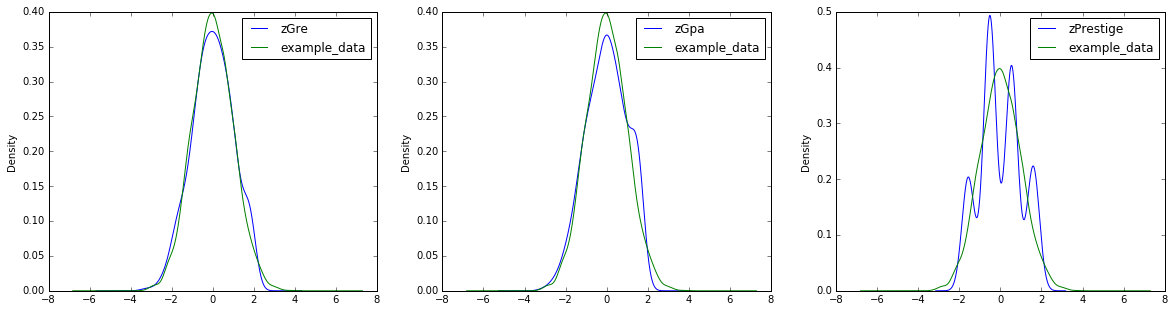

In [12]:
import scipy.stats as ssm

fig, axs = plt.subplots(1,3)

# standardize the data
zGRE = pd.DataFrame({'zGre':ssm.mstats.zscore(dfCopy['gre'],ddof=1)})
zGPA = pd.DataFrame({'zGpa':ssm.mstats.zscore(dfCopy['gpa'],ddof=1)})
zPrestige = pd.DataFrame({'zPrestige':ssm.mstats.zscore(dfCopy['prestige'],ddof=1)})

# plot the z scores with a normal distribution overlaid
zGRE.plot(kind = 'density',ax=axs[0], figsize = (20,5))
exData.plot(kind='density',ax=axs[0])

zGPA.plot(kind='density',ax=axs[1])
exData.plot(kind='density',ax=axs[1])

zPrestige.plot(kind='density',ax=axs[2])
exData.plot(kind='density',ax=axs[2])

plt.show()

Judging from a visual inspection, it seems like GRE and GPA are actually very close to a normal distribution. 
Prestige still should not be compared in the same way.

**coming back to question 3...**
Just for fun, let's compare the standard deviations of gre and gpa after converting to their z-scores.

In [165]:
print 'gpa - ', str(np.std(zGPA.zGpa))
print 'gre - ', str(np.std(zGRE.zGre))

gpa -  0.998739760054
gre -  0.998739760054


To continue our assesment, we can attempt to test for normal distribution with a Shapiro test of normality. This test evaluates the null hypothesis that the given data was drawn from a normal distribution.

In [13]:
print "GRE - ", ssm.shapiro(zGRE.zGre)
print "GPA - ", ssm.shapiro(zGPA.zGpa)
print "Example Data - ", ssm.shapiro(exData.example_data)


GRE -  (0.9857397079467773, 0.00060414825566113)
GPA -  (0.9772246479988098, 6.788578502892051e-06)
Example Data -  (0.9996196627616882, 0.5663520693778992)


#### interpreting the shapiro test
ssm.shapiro() returns two values - the test statistic and the p-value. 
The test statistics for GRE and GPA are very close to 1, which indicates that they do in fact closely resemble a normal distribution. However, the p-values are incredibly low. Because of this, we should reject the null hypothesis.

To compare, a Shapiro test was also done on the randomly generated normally distributed data from before. This test yields a test statistic of 0.999, and a p-value of 0.72 - well above 0.05. For this distribution, we do not reject the null hypothesis that the data comes from a normal distribution.

#### Q-Q Plot
We can also see how the data looks on a Q-Q plot, and see how well the best fit line matches a normal distribution.

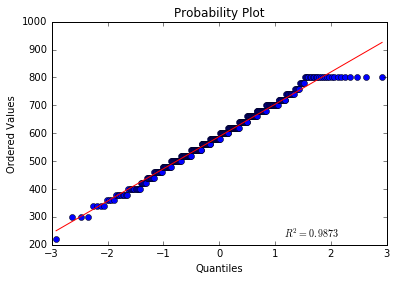

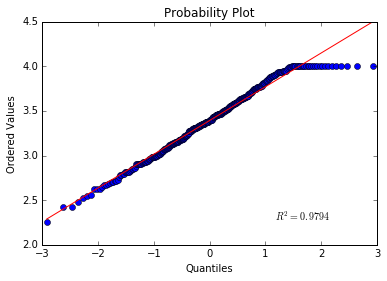

In [65]:

axis1 = ssm.probplot(dfCopy['gre'].values.tolist(),plot=plt)#,ax=axs[0])
plt.show()
axis2 = ssm.probplot(dfCopy['gpa'].values.tolist(),plot=plt)#,ax=axs[1])
plt.show()

#plt.plot(data = axis1,ax=axs[0])
#plt.plot(data = axis2,ax=axs[1])


#### Interpreting the Q Q plot

It seems like the perfectionists out there are the reason our data is skewed. There is a high number of people with 4.0 GPA's and GRE scores of 800. If this data is ignored, we could say the distribution is fairly linear. Unfortunately, we can't do this, so we must find another way.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: While our data are approximately normally distributed, the high degree of kurtosis causes a deviation which is too high to consider it normal. To correct the data, we would need to apply some kind of transform. 

We can try applying the central limit theorem to our data to see how normal we are able to get our distribution.

GRE -  (0.9996391534805298, 0.5236174464225769)
GPA -  (0.9996765851974487, 0.6354959607124329)


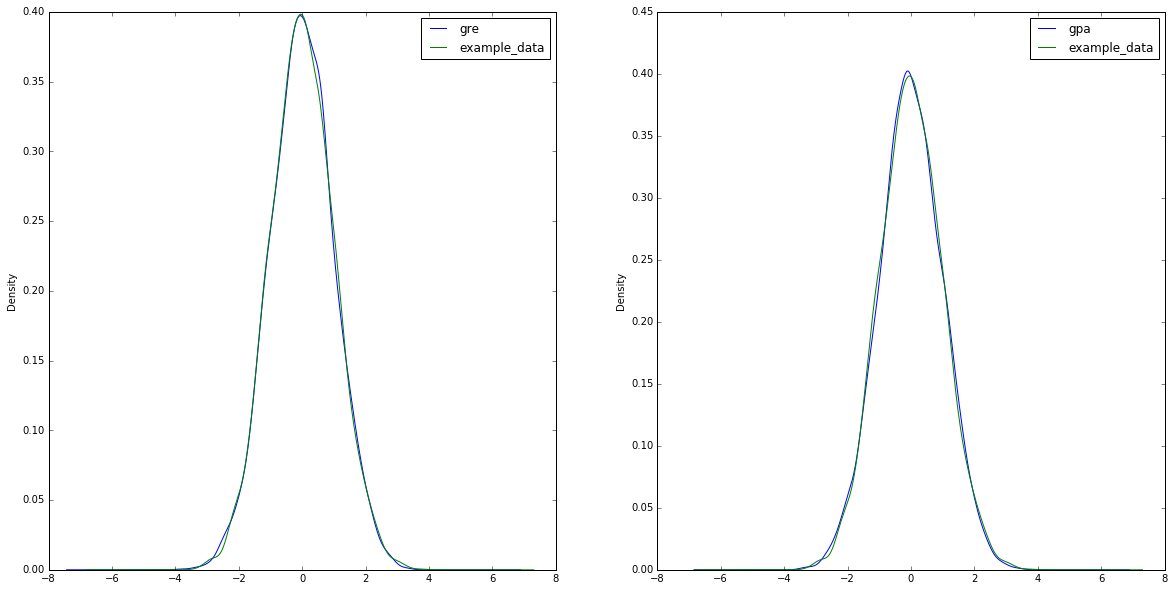

In [37]:
type(exData.example_data)
def central(data):
    newdata = []
    n = 0
    m = 0
    navgs = 40
    while n < 5000: #repeat this test 5000 times
        thisAvg = 0 #seed average
        
        for m in range(0,navgs): #number of random samples to pull for the average
            randnum = np.random.randint(0,len(data))
            thisAvg += data[randnum]
        
        thisAvg = thisAvg/navgs
        newdata.append(thisAvg)
        n = n+1
    
    return newdata

#newdata = central(exData.example_data.values.tolist())

fig, axs = plt.subplots(1,2)

newdataGRE = central(zGRE.zGre.values.tolist())
dfnewGRE = pd.DataFrame({'gre':ssm.mstats.zscore(newdataGRE)})
dfnewGRE.plot(kind='density',ax=axs[0],figsize=(20,10))
exData.example_data.plot(kind='density',ax=axs[0],legend=True)


#ssm.mstats.zscore(dfCopy['gpa'],ddof=1)}


newdataGPA = central(zGPA.zGpa.values.tolist())
dfnewGPA = pd.DataFrame({'gpa':ssm.mstats.zscore(newdataGPA)})
dfnewGPA.plot(kind='density',ax=axs[1])
exData.example_data.plot(kind='density',ax=axs[1],legend=True)


print 'GRE - ', ssm.shapiro(dfnewGRE.gre)
print 'GPA - ', ssm.shapiro(dfnewGPA.gpa)

Applying the central limit theorem to our data, we see that they come even closer to a normal distribution. This is due to the nature of the theorem. It states that regardless of a given random variable's distribution, repeated resampling and averaging will yield a normal distribution, given that it has a well-defined expected value and variance. A visual inspection, as well as the results of our shapiro test further reflect this.

#### Question 11. Which of our variables are potentially colinear? 

In [33]:
# create a correlation matrix for the data
print dfCopy.corr()


             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


#### Question 12. What did you find?

Answer: None of our variables seem to be colinear. We tend to have very low r2 values between all of the variables. For a better visual representation, we can create a scatter plot between gre and gpa to have a more intuitive explanation of this (as well as a quick sanity check that our code is doing what it should).

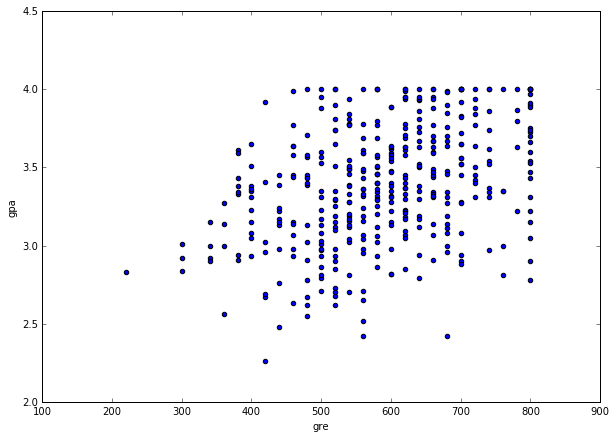

In [34]:
dfCopy.plot(kind='scatter', x='gre', y='gpa',figsize=[10,7])

This scatter plot shows no signs of linearity. If we fit a linear model to this data, the variance would be incredibly high, and our predicitons would be somewhat unreliable.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

Since grad school admissions rates and prestige are both non-continuous, this seems like it would be a good classification problem. 

First, we could group the data into four groups based on the prestige of the school. Next, we could compare number of admissions vs non-admissions for each prestige rating relative to the size of each group. This would give a rough indication of any possible trends.

Next, as a more formal measure, we could perform a t-test on the prestige rating of the admitted students vs. the prestige ratings of the non-admitted students. A t-test would provide a measure of how dissimilar the two sets are.

#### Question 14. What is your hypothesis? 

Answer: 
Null Hypothesis: For students who were admitted to graduate school, the prestige rating of their alma mater does not differ from the prestige rating for that of the non-admitted students.

If we reject this hypothesis, we may say that the two variables are not related. If we choose not to reject this hypothesis, we have an indication that the results *may* be statistically significant.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Instead of dropping missing data, we can create a model to fill in missing values by predicting their values based on the adjacent observed values. However, judging by our findings of co-linearity between our continuous variables, we would need a more complicated model which would also factor in the prestige and admission status.

We could also use an aggregate, such as mean or median, to "plug" any holes in the data. For example, the mean of our "gpa" data is 3.39, so we could plug any missing entries with 3.39. 

Taking this a step further, we could group the data into clusters, and compute the aggregates for each cluster. Next, we look at the entries with missing data, and determine which cluster each entry would fall into. Once the appropriate cluster is determined, we can assign the appropriate aggregate to each data point's missing values.

#### 2. Bonus: Log transform the skewed data

gre
gpa


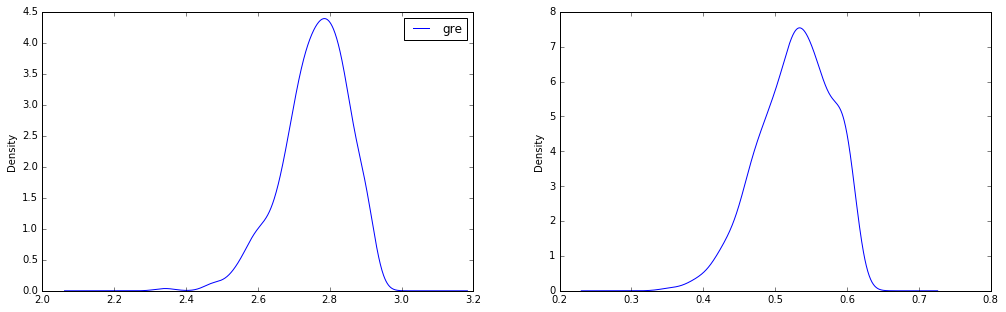

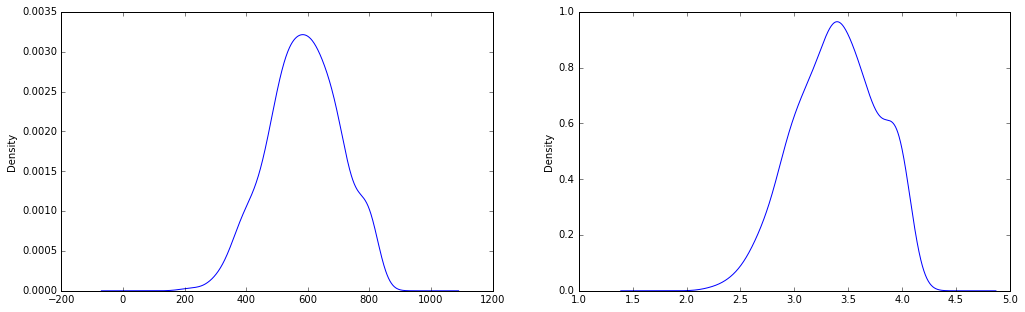

In [152]:
del dfLog
dfLog = pd.DataFrame()

for n in ['gre','gpa']:#dfCopy.keys():
    thisDict = {n: np.log10(dfCopy[n])}
    dfLog[n] = thisDict[n]
    print n

fig, axs = plt.subplots(1,2)

dfLog.gre.plot(kind='density',ax=axs[0], figsize = (17,5),legend='True')
dfLog.gpa.plot(kind='density',ax=axs[1])

fig, axs = plt.subplots(1,2)

dfCopy.gre.plot(kind='density',ax=axs[0],figsize = (17,5))
dfCopy.gpa.plot(kind='density',ax=axs[1])

#### 3. Advanced: Impute missing data
Here, we will replace the missing (nan) values with the means of each variable

In [178]:
avgGre = dfCopy.gre.mean()
avgGpa = dfCopy.gre.mean()
avgPrestige = np.int(np.round(dfCopy.prestige.mean()))

meanDict = {'gpa':avgGpa,
            'gre':avgGre,
            'prestige': avgPrestige}

dfCopy2 = dfCopy.copy()

